In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
df = pd.read_csv('911.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [7]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


In [10]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [11]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [14]:
df['title'].nunique()

110

In [28]:
df['title'].str.split(':')[0]

['EMS', ' BACK PAINS/INJURY']

In [29]:
df['title'].str.split(':')[1]

['EMS', ' DIABETIC EMERGENCY']

In [31]:
type(df['title'].iloc[0])

str

In [32]:
type(df['title'].iloc[1])

str

In [57]:
df['Reason'] = df['title'].apply(lambda x : x.split(": ")[1])

In [58]:
df['Reason']

0         BACK PAINS/INJURY
1        DIABETIC EMERGENCY
2             GAS-ODOR/LEAK
3         CARDIAC EMERGENCY
4                 DIZZINESS
                ...        
99487    VEHICLE ACCIDENT -
99488    VEHICLE ACCIDENT -
99489           FALL VICTIM
99490       NAUSEA/VOMITING
99491    VEHICLE ACCIDENT -
Name: Reason, Length: 99492, dtype: object

In [59]:
df['Reason'].nunique()

81

In [60]:
df['Reason'].value_counts()

VEHICLE ACCIDENT -       23066
DISABLED VEHICLE -        7702
VEHICLE ACCIDENT          5573
FIRE ALARM                5510
RESPIRATORY EMERGENCY     5112
                         ...  
PLANE CRASH                  2
SUSPICIOUS                   2
ACTIVE SHOOTER               2
BOMB DEVICE FOUND            1
DISABLED VEHICLE             1
Name: Reason, Length: 81, dtype: int64

In [61]:
df['Department'] = df['title'].apply(lambda x : x.split(": ")[0])

In [65]:
df['Department'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

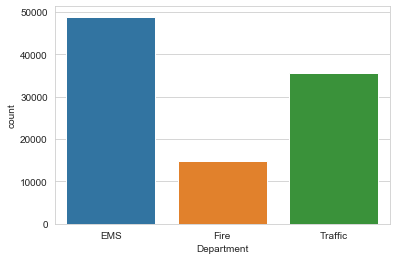

In [75]:
#sns.countplot(x = 'Department', data = df)
sns.countplot(df['Department'] , data = df)

In [80]:
type(df['timeStamp'].iloc[0])

str

In [81]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [82]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [83]:
type(df['timeStamp'])

pandas.core.series.Series

In [86]:
df['timeStamp']

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

In [87]:
time = df['timeStamp'].iloc[0]

In [89]:
df['Hour'] = df['timeStamp'].apply(lambda x : x.hour)
df['Month'] = df['timeStamp'].apply(lambda x : x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x : x.dayofweek)

In [94]:
df['Day of Week']

0        3
1        3
2        3
3        3
4        3
        ..
99487    2
99488    2
99489    2
99490    2
99491    2
Name: Day of Week, Length: 99492, dtype: int64

In [95]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [96]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [110]:
df['Day of Week']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Day of Week, Length: 99492, dtype: object

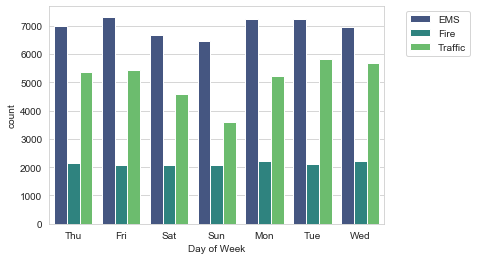

In [112]:
sns.countplot(x='Day of Week',data=df,hue='Department',palette='viridis')
plt.legend(loc=0, bbox_to_anchor=(1.05, 1))

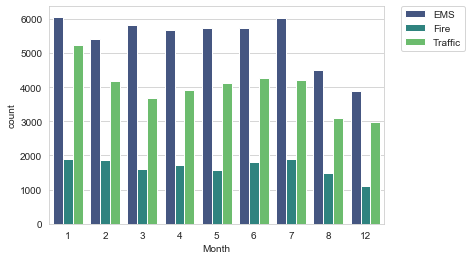

In [113]:
sns.countplot(x='Month',data=df,hue='Department',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [116]:
#byMonth = df.groupby('Month').count()
byMonth = df.groupby(['Month']).count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Department,Hour,Day of Week
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


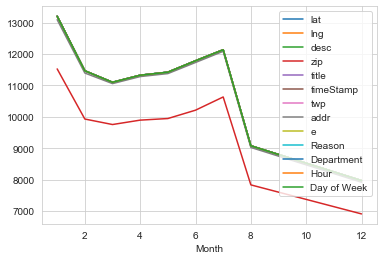

In [119]:
byMonth.plot()

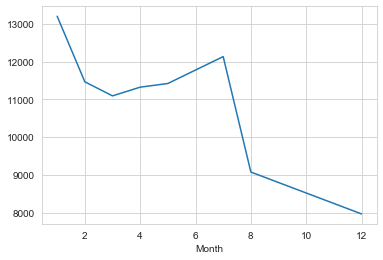

In [120]:
byMonth['twp'].plot()

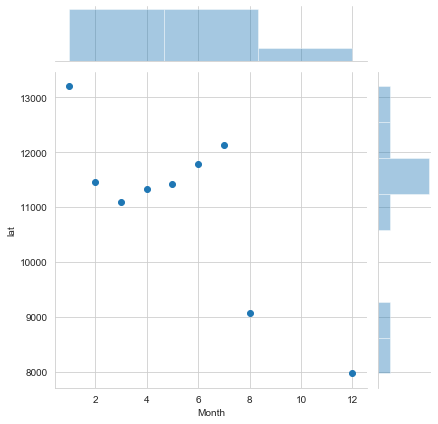

In [134]:
sns.jointplot (x = 'Month' , y = 'lat', data=byMonth.reset_index())

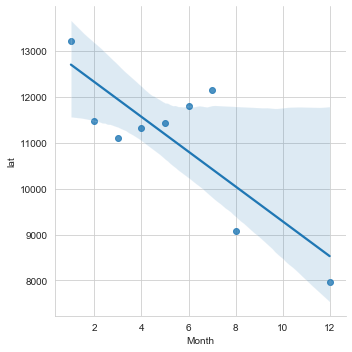

In [135]:
sns.lmplot (x = 'Month' , y = 'lat', data=byMonth.reset_index())

In [136]:
byMonth.reset_index().head()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Department,Hour,Day of Week
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


In [137]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Department,Hour,Day of Week
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


In [138]:
df['Date'] = df['timeStamp'].apply(lambda x : x.date())

In [141]:
df.groupby(['Date']).count().reset_index().head()

,Date,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Department,Hour,Month,Day of Week
0,2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115,115
1,2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396,396
2,2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403,403
3,2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319,319
4,2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447,447


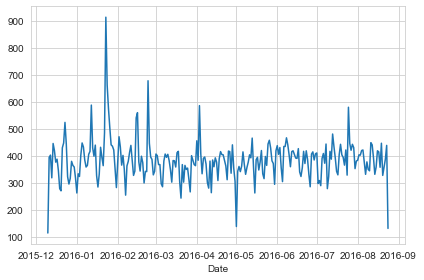

In [142]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

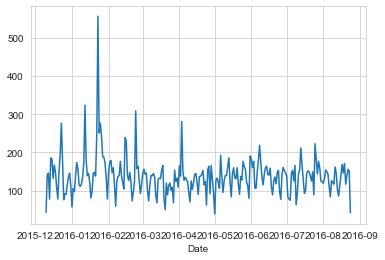

In [149]:
df[df['Department']=='Traffic'].groupby(['Date'])['twp'].count().plot()

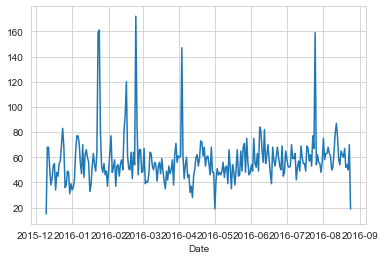

In [150]:
df[df['Department']=='Fire'].groupby(['Date'])['twp'].count().plot()

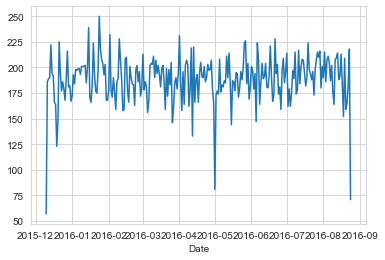

In [151]:
df[df['Department']=='EMS'].groupby(['Date'])['twp'].count().plot()

In [156]:
df.groupby(['Day of Week', 'Hour']).count() 

lat  lng  desc  zip  title  timeStamp  twp  addr    e  \
Day of Week Hour                                                          
Fri         0     275  275   275  248    275        275  275   275  275   
            1     235  235   235  200    235        235  235   232  235   
            2     191  191   191  165    191        191  191   191  191   
            3     175  175   175  164    175        175  175   175  175   
            4     201  201   201  184    201        201  201   201  201   
...               ...  ...   ...  ...    ...        ...  ...   ...  ...   
Wed         19    686  686   686  590    686        686  686   682  686   
            20    668  668   668  597    668        668  668   662  668   
            21    575  575   575  508    575        575  574   572  575   
            22    490  490   490  432    490        490  490   485  490   
            23    335  335   335  294    335        335  334   335  335   

                  Reason  Department  Month  Date  
Day of Week Hour                                   
Fri         0        275         275    275   275  
            1        235         235    235   235  
            2        191         191    191   191  
            3        175         175    175   175  
            4        201         201    201   201  
...                  ...         ...    ...   ...  
Wed         19       686         686    686   686  
            20       668         668    668   668  
            21       575         575    575   575  
            22       490         490    490   490  
            23       335         335    335   335  

[168 rows x 13 columns]

In [159]:
df.groupby(['Day of Week', 'Hour']).count().unstack()

lat                                               ... Date       \
Hour          0    1    2    3    4    5    6    7    8    9   ...   14   15   
Day of Week                                                    ...             
Fri          275  235  191  175  201  194  372  598  742  752  ...  932  980   
Mon          282  221  201  194  204  267  397  653  819  786  ...  869  913   
Sat          375  301  263  260  224  231  257  391  459  640  ...  789  796   
Sun          383  306  286  268  242  240  300  402  483  620  ...  684  691   
Thu          278  202  233  159  182  203  362  570  777  828  ...  876  969   
Tue          269  240  186  170  209  239  415  655  889  880  ...  943  938   
Wed          250  216  189  209  156  255  410  701  875  808  ...  904  867   

                                                       
Hour           16    17   18   19   20   21   22   23  
Day of Week                                            
Fri          1039   980  820  696  667  559  514  474  
Mon           989   997  885  746  613  497  472  325  
Sat           848   757  778  696  628  572  506  467  
Sun           663   714  670  655  537  461  415  330  
Thu           935  1013  810  698  617  553  424  354  
Tue          1026  1019  905  731  647  571  462  274  
Wed           990  1037  894  686  668  575  490  335  

[7 rows x 312 columns]

In [162]:
y = df.groupby(['Day of Week', 'Hour']).count()['Department'].unstack()

In [163]:
y

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


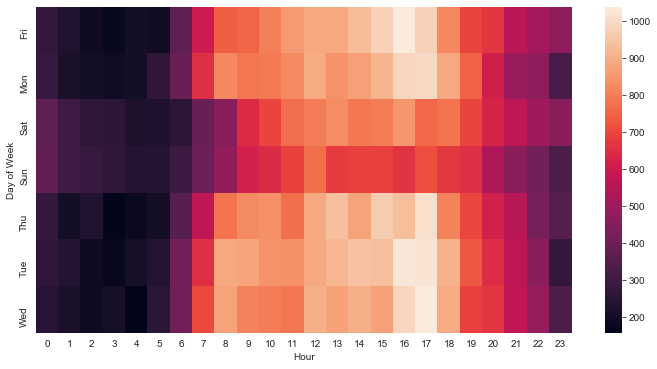

In [168]:
plt.figure(figsize=(12,6))
sns.heatmap(y)

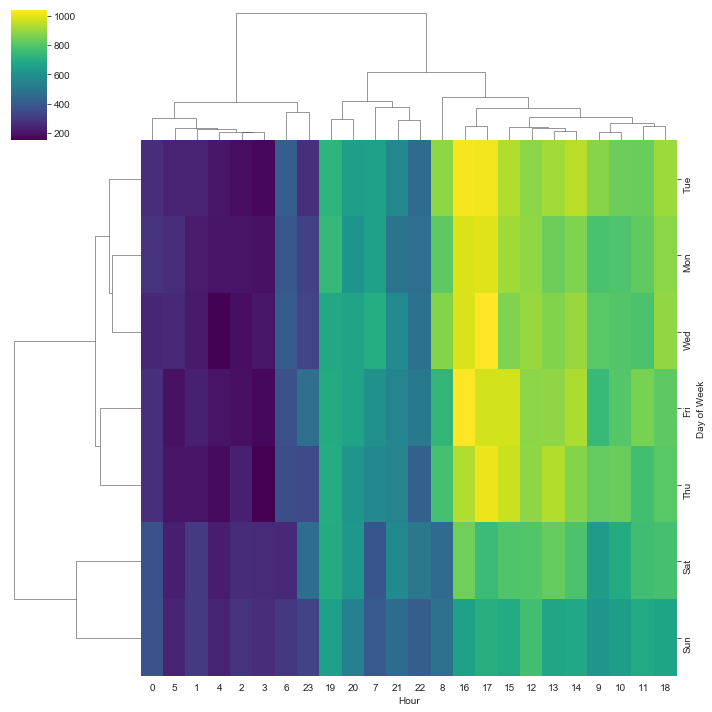

In [169]:
sns.clustermap(y,cmap='viridis')